State changes simulation
------------------------

The goal is to provide a small tool to visualize the effect of state-changes on the empirical propagator of freely-diffusing particles. Since this is done for example purposes, we only implement the two-states model (one bound, one free state).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Define parameters

## Internal parameters
rmax = 1.0
N = 200
r = np.linspace(0, rmax, num=N)

In [11]:
## Functions
def I(r, t1, t2, sigma, Df=2.0, Db=0.02):
    """Probability function"""
    sigsq = sigma*sigma
    return r/(2*(Df*t2+Db*(t1-t2)+sigsq))*np.exp(-r**2/(4*(Df*t2+Db*(t1-t2)+sigsq)))

def _partial(kon, koff, t1, t2, m):
    """To move into g"""
    return (kon*koff)**m/(kon+koff)*(koff*t2+kon*(t1-t2)+2*m)/(np.math.factorial(m)*np.math.factorial(m-1))*np.exp(-kon*t2-koff*(t1-t2))*(t2*(t1-t2))**(m-1)

def g(t2,t1, kon, koff):
    Ceq = kon/(kon+koff)
    T1 = 0
    T2 = 0
    if t2==0:
        T1 = Ceq*np.exp(-koff)
    elif t1-t2==0:
        T2 = (1-Ceq)*np.exp(-kon*t2)
    i=1
    part = 0
    print kon, koff, t1, t2
    spart = _partial(kon, koff, t1, t2, i)
    while spart > 1e-12:
        part += spart
        i+=1
        spart = _partial(kon, koff, t1, t2, i)
    print i
    return T1 + T2 + part

def integ(r,t,kon, koff, Df=2.0, Db=0.02, sigma=0.01, np=1000):
    s = 0
    for i in range(np+1):
        t2 = float(i)/np*t
        #gg.append( g(t2,t,kon,koff))
        #print gg, t-t2
        s+=g(t2,t,kon,koff)*I(r, t, t2, sigma, Df, Db)
    return s/s.sum()

0.5 0.1 0.01 0.0
2
0.5 0.1 0.01 1e-05
3
0.5 0.1 0.01 2e-05
3
0.5 0.1 0.01 3e-05
3
0.5 0.1 0.01 4e-05
3
0.5 0.1 0.01 5e-05
3
0.5 0.1 0.01 6e-05
3
0.5 0.1 0.01 7e-05
3
0.5 0.1 0.01 8e-05
3
0.5 0.1 0.01 9e-05
3
0.5 0.1 0.01 0.0001
3
0.5 0.1 0.01 0.00011
3
0.5 0.1 0.01 0.00012
3
0.5 0.1 0.01 0.00013
3
0.5 0.1 0.01 0.00014
3
0.5 0.1 0.01 0.00015
3
0.5 0.1 0.01 0.00016
3
0.5 0.1 0.01 0.00017
3
0.5 0.1 0.01 0.00018
3
0.5 0.1 0.01 0.00019
3
0.5 0.1 0.01 0.0002
3
0.5 0.1 0.01 0.00021
3
0.5 0.1 0.01 0.00022
3
0.5 0.1 0.01 0.00023
3
0.5 0.1 0.01 0.00024
3
0.5 0.1 0.01 0.00025
3
0.5 0.1 0.01 0.00026
3
0.5 0.1 0.01 0.00027
3
0.5 0.1 0.01 0.00028
3
0.5 0.1 0.01 0.00029
3
0.5 0.1 0.01 0.0003
3
0.5 0.1 0.01 0.00031
3
0.5 0.1 0.01 0.00032
3
0.5 0.1 0.01 0.00033
3
0.5 0.1 0.01 0.00034
3
0.5 0.1 0.01 0.00035
3
0.5 0.1 0.01 0.00036
3
0.5 0.1 0.01 0.00037
3
0.5 0.1 0.01 0.00038
3
0.5 0.1 0.01 0.00039
3
0.5 0.1 0.01 0.0004
3
0.5 0.1 0.01 0.00041
3
0.5 0.1 0.01 0.00042
3
0.5 0.1 0.01 0.00043
3
0.5 0.1 0.01 0

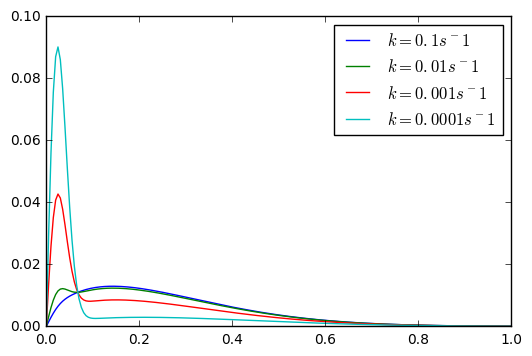

In [12]:
K = [0.1, 0.01, 0.001, 0.0001]
#K = [0.00001]
D = np.array([0.5, 1, 2, 5, 10])

## Compute
AK = []
gg = []
for k in K:
    #II=integ(r, t=0.01, kon=K[0], koff=K[0], Df=k)
    II=integ(r, t=0.01, kon=5*k, koff=k, Df=D[3])
    AK.append(II)
    
## Plot
for (k,II) in zip(K,AK):
    plt.plot(r,II, label="$k={} s^-1$".format(k))
plt.legend()

#plt.plot(gg)

In [10]:
_partial(0.01*5, 0.01, 0.2, 0.1, 2)

8.2959082583334678e-08